# **Download and import the library**

In [1]:
# Install extra libs
!pip install -q seaborn scikit-learn imbalanced-learn


In [2]:

# ---------- 1. Imports ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid", rc={"figure.figsize": (8, 5)})


# **Download the uci data**

In [3]:

# Download the uci data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"

# **Read the Liver Dataset**

In [4]:

col_names = ["mcv", "alkphos", "sgpt", "sgot", "gammagt",
             "drinks",        # alcohol units / day
             "selector"]      # 1 = liver disease, 2 = healthy
df = pd.read_csv(url, header=None, names=col_names, skipinitialspace=True)


# **Data Statics**

In [5]:
df.shape

(345, 7)

In [6]:
df.columns

Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'], dtype='object')

In [7]:
df

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [8]:
print("\nMissing values\n--------------")
print(df.isna().sum())


Missing values
--------------
mcv         0
alkphos     0
sgpt        0
sgot        0
gammagt     0
drinks      0
selector    0
dtype: int64


In [9]:
print("\nFive-number summary\n-------------------")
display(df.describe().T)



Five-number summary
-------------------


,count,mean,std,min,25%,50%,75%,max
mcv,345.0,90.159420,4.448096,65.0,87.0,90.0,93.0,103.0
alkphos,345.0,69.869565,18.347670,23.0,57.0,67.0,80.0,138.0
sgpt,345.0,30.405797,19.512309,4.0,19.0,26.0,34.0,155.0
sgot,345.0,24.643478,10.064494,5.0,19.0,23.0,27.0,82.0
gammagt,345.0,38.284058,39.254616,5.0,15.0,25.0,46.0,297.0
drinks,345.0,3.455072,3.337835,0.0,0.5,3.0,6.0,20.0
selector,345.0,1.579710,0.494322,1.0,1.0,2.0,2.0,2.0


In [10]:

# Remove perfect duplicates (rare but good practice)
df.drop_duplicates(inplace=True)
print("\nShape after dropping duplicates:", df.shape)



Shape after dropping duplicates: (341, 7)


# *Exploratory Data Analysis**

## **Class Distribution**

<ipython-input-12-3722537344>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="selector", data=df, palette="Set2", ax=ax)


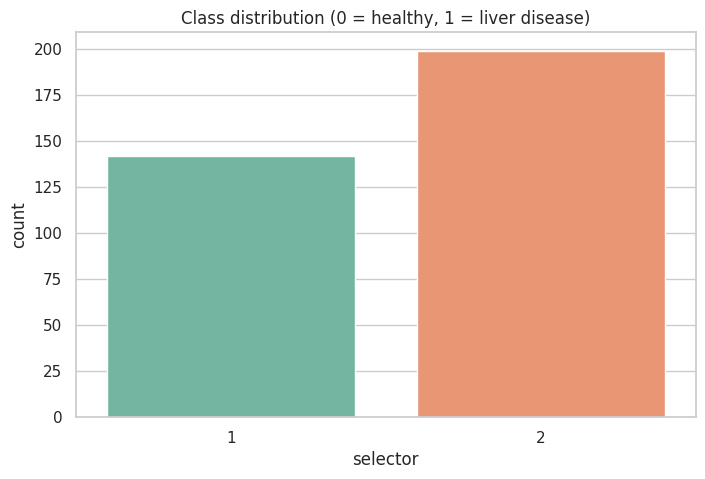

In [12]:
# Class balance
fig, ax = plt.subplots()
sns.countplot(x="selector", data=df, palette="Set2", ax=ax)
ax.set_title("Class distribution (0 = healthy, 1 = liver disease)")
plt.show()

## **Histograms**

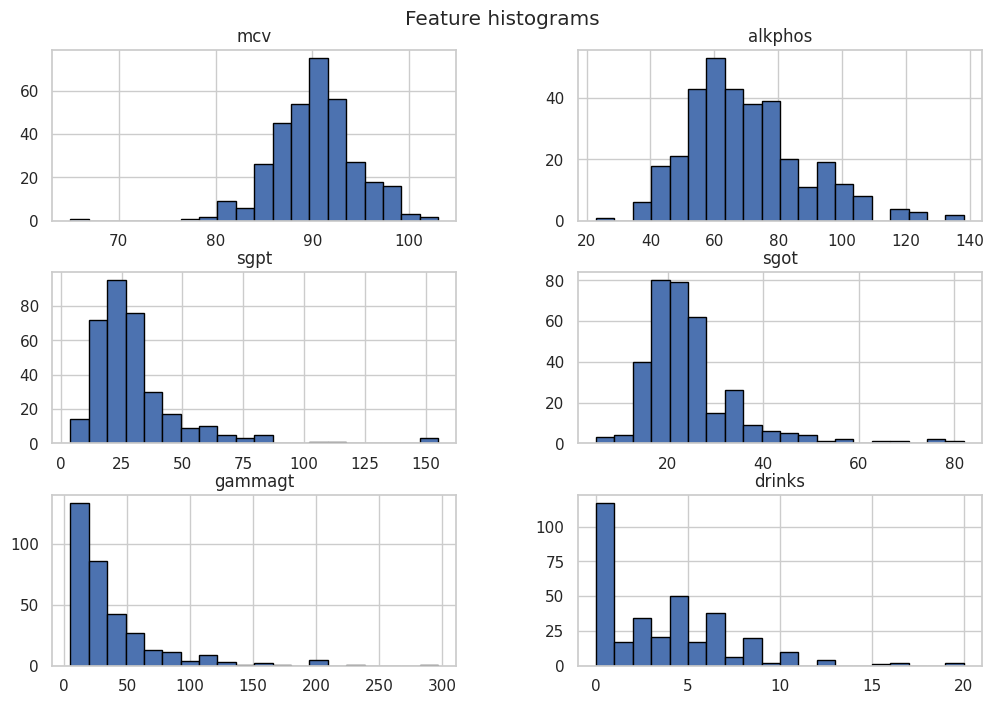

In [14]:
# Histograms
df.drop(columns="selector").hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Feature histograms", y=0.93)
plt.show()

## **Box-plots**

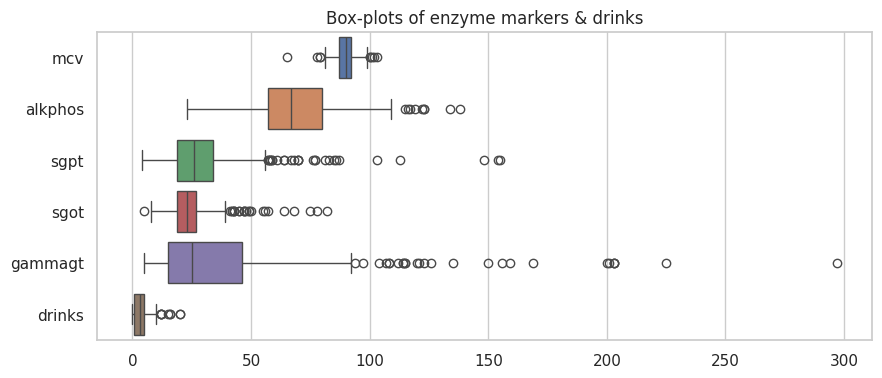

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df.drop(columns="selector"), orient="h")
plt.title("Box-plots of enzyme markers & drinks")
plt.show()

## **Correlation Matrix**

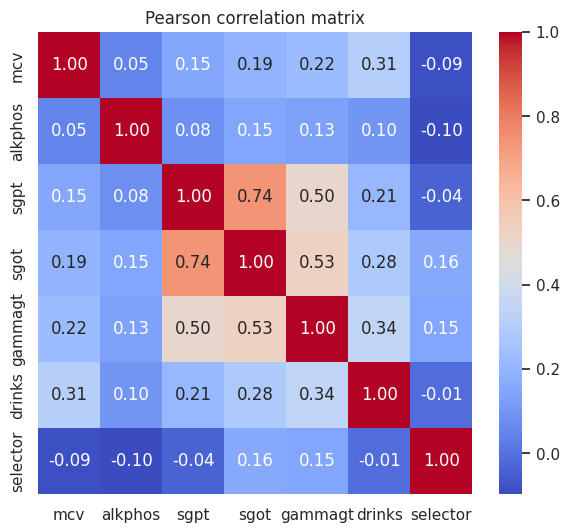

In [16]:
plt.figure(figsize=(7, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson correlation matrix")
plt.show()


In [19]:
# Pre-processing
X = df.drop(columns="selector")
y = df["selector"]


# **Data Splitting**

In [20]:

# Train / test split (70 / 30) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


## **Standard Scale**

In [21]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
